In [ ]:
#240701578
#varnika
#

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('sales_data.csv')

print(df.head())

print(df.isnull().sum())

df['Sales'] = df['Sales'].fillna(df['Sales'].mean())

df.dropna(subset=['Product', 'Quantity', 'Region'], inplace=True)

df

         Date    Product  Sales  Quantity Region
0  01-01-2023  Product A    200         4  North
1  02-01-2023  Product B    150         3  South
2  03-01-2023  Product A    220         5  North
3  04-01-2023  Product C    300         6   East
4  05-01-2023  Product B    180         4   West
Date        0
Product     0
Sales       0
Quantity    0
Region      0
dtype: int64


,Date,Product,Sales,Quantity,Region
0,01-01-2023,Product A,200,4,North
1,02-01-2023,Product B,150,3,South
2,03-01-2023,Product A,220,5,North
3,04-01-2023,Product C,300,6,East
4,05-01-2023,Product B,180,4,West
5,06-01-2023,Product A,210,5,North
6,07-01-2023,Product C,320,7,East
7,08-01-2023,Product B,160,3,South
8,09-01-2023,Product A,230,6,North
9,10-01-2023,Product C,310,7,East


In [22]:
product_summary = df.groupby('Product').agg({
'Sales': 'sum',
'Quantity': 'sum'
}).reset_index()
print(product_summary)

     Product  Sales  Quantity
0  Product A   1350        33
1  Product B    850        17
2  Product C   1600        36


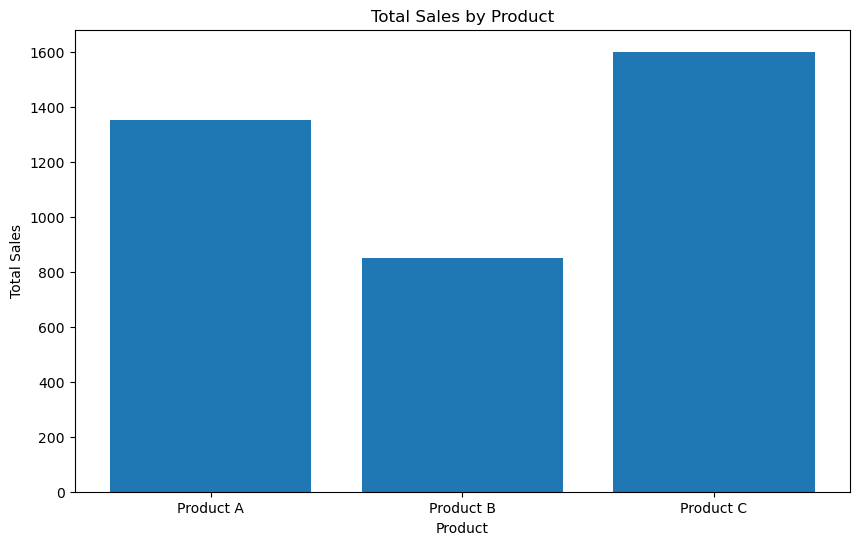

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(product_summary['Product'], product_summary['Sales'])
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product')
plt.show()

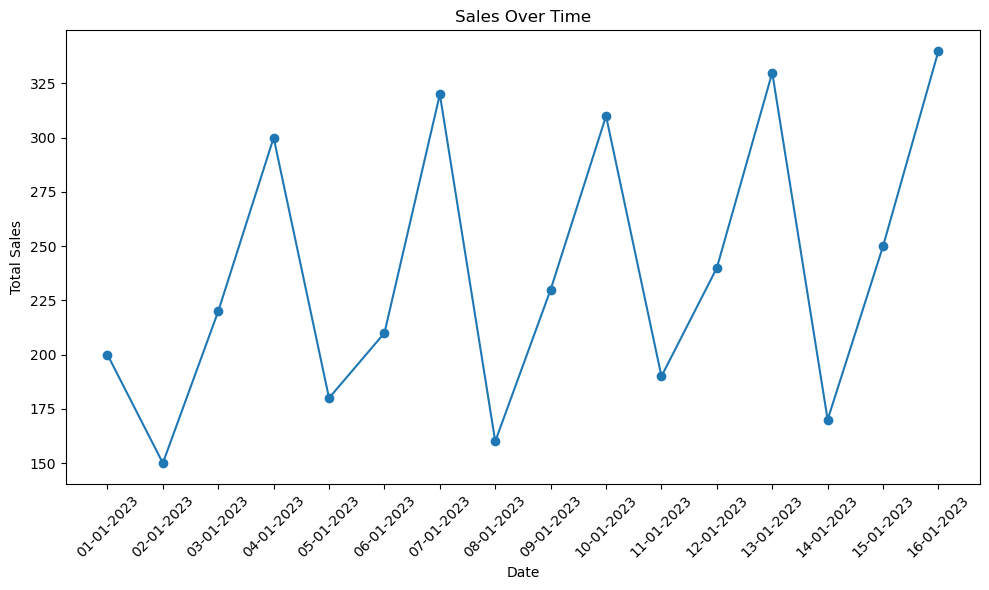

In [34]:
df = df.dropna(subset=['Date'])
sales_over_time = df.groupby('Date', as_index=False)['Sales'].sum()
plt.figure(figsize=(10, 6))
plt.plot(sales_over_time['Date'], sales_over_time['Sales'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
pivot_table = df.pivot_table(values='Sales', index='Region', columns='Product',
                             aggfunc='sum', fill_value=0)
print(pivot_table)

# Only correlate numeric columns
correlation_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_matrix)

Product  Product A  Product B  Product C
Region                                  
East             0          0       1600
North         1350          0          0
South            0        480          0
West             0        370          0
             Sales  Quantity
Sales     1.000000  0.944922
Quantity  0.944922  1.000000


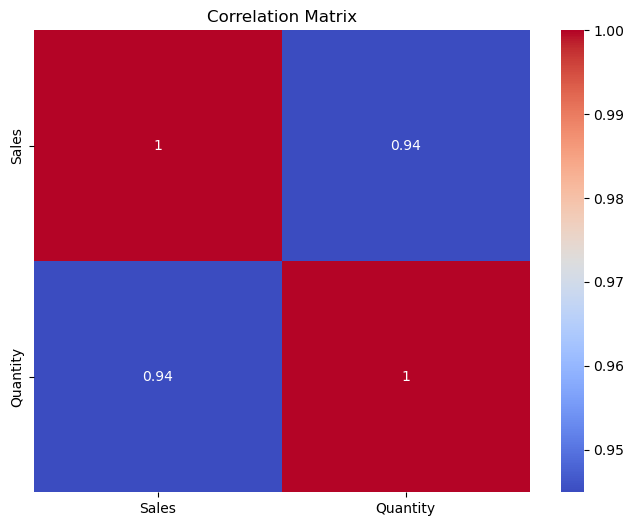

In [44]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()